### 4. Simulation of 2D random walks
Consider a two-dimensional random walk starting at the origin with
positions $\vec{r}_i =\sum^i_{k=1} \vec{b}_k$ where $\vec{b}_k = (b_{x,k}, b_{y,k})$ are random unit vectors.
In polar coordinates they can be parametrized as $\vec{b}_k = (\cos(\varphi_k),\sin(\varphi_k))$
with $\varphi_k = 2 \pi r$ with a (pseudo) random number $r \in [0, 1)$.
Simulate $10 000$ such random walks with up to $N = 100$ steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal as dec

In [2]:
def gen_paths(N_steps,N_paths,seed=54321):
    #choose random angle for every step of each walk
    rng = np.random.default_rng(seed=seed) #initialize random number generator
    theta = rng.random((N_steps,N_paths)) * 2*np.pi #(step,path)

    #create the unit vectors for every step of each walk
    steps = np.stack([np.sin(theta),np.cos(theta)]) #(dim,step,path)

    #sum up the steps to get the paths
    paths = np.zeros((2,N_steps+1,N_paths)) #initialize paths so they start at (0,0)
    paths[:,1:,:] = np.cumsum(steps,axis=1) #start summation at 1st entry of paths
    return paths

#steps = 100, #paths = 10,000


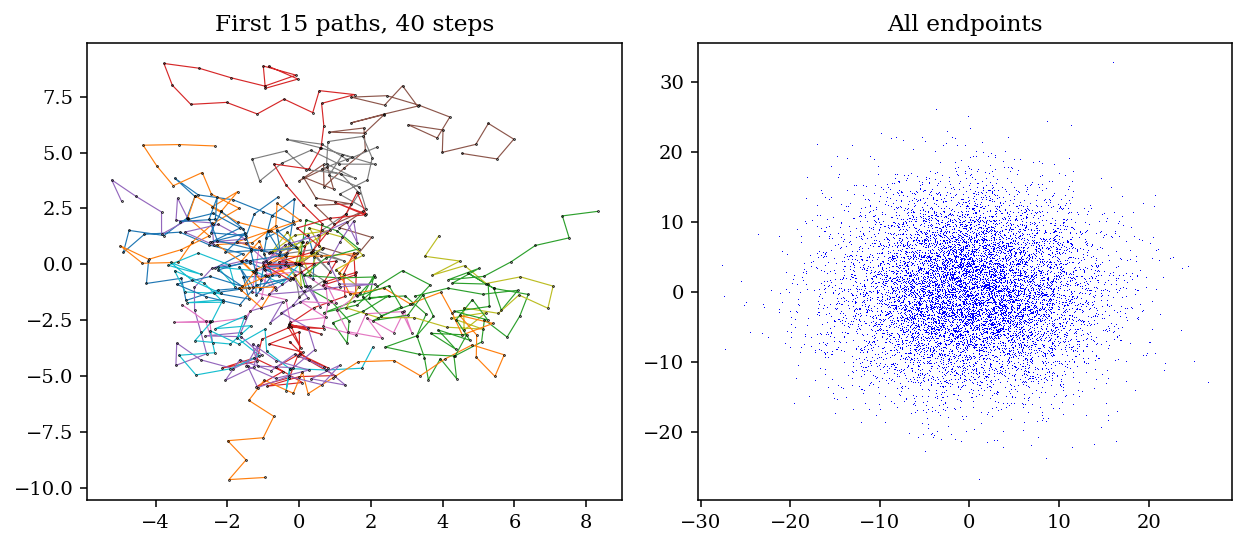

In [3]:
N_paths = 10_000
N_steps = 100
paths = gen_paths(N_steps,N_paths)
print(f"#steps = {N_steps:,}, #paths = {N_paths:,}")
#plot the paths
plt.figure(figsize=(9, 4))
plt.subplot(1,2,1)
plt.title("First 15 paths, 40 steps")
plt.plot(paths[0,:40,:15],paths[1,:40,:15],lw=0.6) # pyplot wants (steps,paths)_x,(steps,paths)_y, plot first 15 paths
plt.plot(paths[0,:40,:15],paths[1,:40,:15],"k.",ms=0.7)
plt.subplot(1,2,2)
plt.title("All endpoints")
plt.plot(paths[0,-1],paths[1,-1],"b,") #draw all endpoints
plt.tight_layout()
plt.show()

Measure the average squared end-to-end distance
$$
\langle r_{\mathrm{ee}}^2 \rangle = \langle \vec{r}_{N}^2 \rangle
$$
and the average squared radius of gyration
$$
\langle r_{\mathrm{gyr}}^2 \rangle = \frac{1}{N} \sum^N_{i=1} \langle ( \vec{r}_i - \vec{r}_{\mathrm{com}} )^2 \rangle
$$
where $\vec{r}_{\mathrm{com}} = (1\,/\,N)\sum^N_{i=1}\vec{r}_i$ is the center-of-mass vector.

In [10]:
def R_ee_2(paths):
    return np.average(paths[0,-1,:]**2 + paths[1,-1]**2)
def R_gyr_2(paths):
    R_com = 1/(N_steps+1) * np.sum(paths,axis=1) # (dim,paths)
    #print(f"< R_com >  = {np.average(R_com):2f}")
    betragsquadrat = (paths[0]-R_com[0])**2 + (paths[1]-R_com[1])**2 # (steps,paths)
    R_gyr_2 = 1/(N_steps+1) * np.sum(betragsquadrat,axis=0)
    return np.average(R_gyr_2)

In [9]:
print(f"< R_ee² >  = {R_ee_2(paths)}")
print(f"< R_gyr² > = {R_gyr_2(paths)}")
print(f"Test: < R_gyr² > * 6 = {R_gyr_2(paths)*6}")

< R_ee² >  = 187.95361774483774
< R_gyr² > = 31.65135290465873
Test: < R_gyr² > * 6 = 189.9081174279524


Test the scaling of $\langle r_{\mathrm{ee}}^2 \rangle$ and $\langle r_{\mathrm{gyr}}^2 \rangle$ with $N$ by plotting the results versus $N$.

In [11]:
N_arr = [1,10,20,40,60,80,100,130,160,190]
R_ee_2_arr = []
R_gyr_2_arr = []
for N_steps in N_arr:
    paths = gen_paths(N_steps,N_paths)
    R_ee_2_arr.append(R_ee_2(paths))
    R_gyr_2_arr.append(R_gyr_2(paths))
    

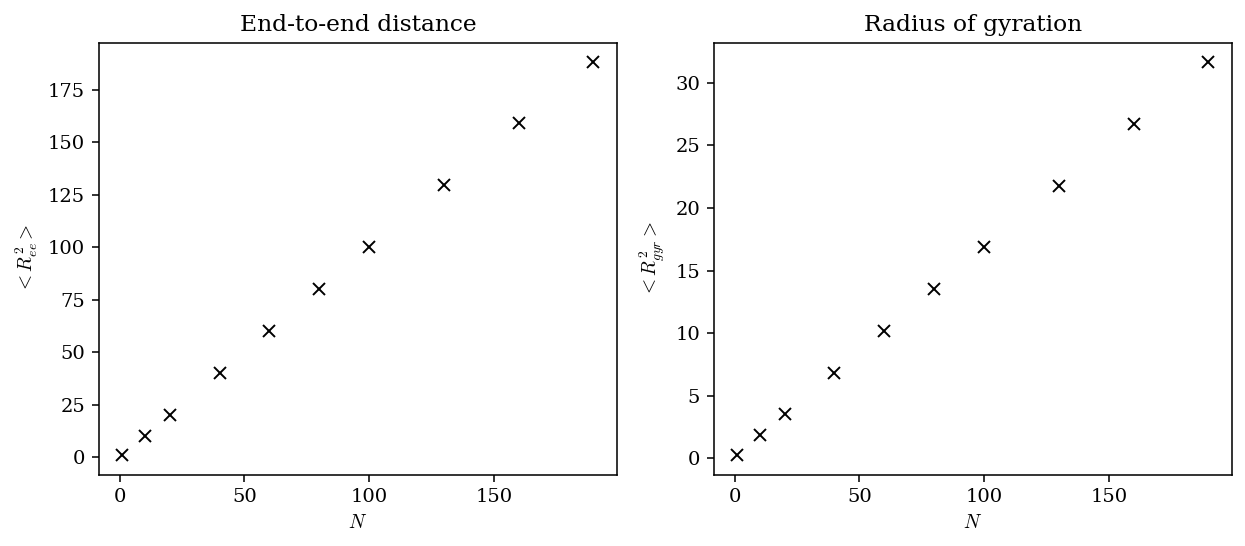

In [12]:
#plot
plt.figure(figsize=(9, 4))
plt.subplot(1,2,1)
plt.plot(N_arr,R_ee_2_arr,"kx")
plt.xlabel("$N$")
plt.ylabel(r"$<R_{ee}^2>$")
plt.title("End-to-end distance")
plt.subplot(1,2,2)
plt.plot(N_arr,R_gyr_2_arr,"kx")
plt.xlabel("$N$")
plt.ylabel(r"$<R_{gyr}^2>$")
plt.title("Radius of gyration")
plt.tight_layout()
plt.show()